
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-output.ipynb)


## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

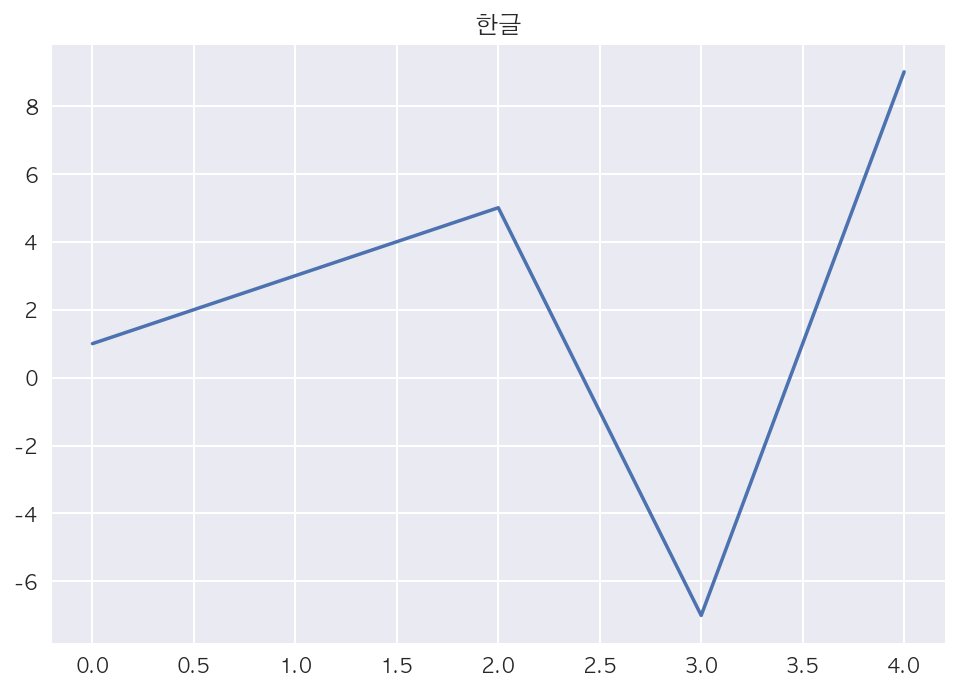

In [6]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

### 제약업종 수집하기
* 제약업종 주소가 변경되었습니다. https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [7]:
# 수집할 업종/테마주소
# url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"
# 2차전지
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64"

In [8]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [9]:
# 데이터들은 table[2]에 전부 있고
# dropna를 통해 결측치를 제거합니다.
# how='all' 이면 전부 결측치일시 row나 column을 제거합니다.
raw = table[2]
print(raw.shape)
raw = raw.dropna(how="all").dropna(axis=1, how="all")
raw.shape
# 3개의 row, 3개의 column이 제거되었습니다.

(82, 12)


(79, 10)

In [10]:
raw

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,웰크론한텍 *,테마 편입 사유,4765.0,820.0,+20.79%,4765.0,4770.0,32171066.0,146663.0,6941573.0
2,이엔드디 *,테마 편입 사유,43500.0,3600.0,+9.02%,43450.0,43500.0,999308.0,41912.0,475248.0
3,삼진엘앤디 *,테마 편입 사유,4465.0,350.0,+8.51%,4465.0,4470.0,65461738.0,310756.0,45874433.0
4,SK이노베이션,테마 편입 사유,283000.0,20000.0,+7.60%,283000.0,283500.0,3363732.0,950235.0,2014564.0
5,일진머티리얼즈,테마 편입 사유,56400.0,3800.0,+7.22%,56300.0,56400.0,1661973.0,91832.0,399206.0
...,...,...,...,...,...,...,...,...,...,...
75,하나기술 *,테마 편입 사유,143400.0,5500.0,-3.69%,143400.0,143500.0,331289.0,48566.0,380067.0
76,씨아이에스 *,테마 편입 사유,10400.0,400.0,-3.70%,10350.0,10400.0,10248736.0,109844.0,21750003.0
77,이아이디,테마 편입 사유,311.0,12.0,-3.72%,311.0,312.0,32436621.0,10203.0,36861303.0
78,나라엠앤디 *,테마 편입 사유,13150.0,650.0,-4.71%,13150.0,13200.0,1655695.0,22094.0,3432023.0


## 파생변수 만들기

In [11]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2021-01-09'

In [12]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
raw["조회일자"] = today

In [13]:
# 조회일자가 추가되었는지 확인해 봅니다.
raw.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,웰크론한텍 *,테마 편입 사유,4765.0,820.0,+20.79%,4765.0,4770.0,32171066.0,146663.0,6941573.0,2021-01-09
2,이엔드디 *,테마 편입 사유,43500.0,3600.0,+9.02%,43450.0,43500.0,999308.0,41912.0,475248.0,2021-01-09
3,삼진엘앤디 *,테마 편입 사유,4465.0,350.0,+8.51%,4465.0,4470.0,65461738.0,310756.0,45874433.0,2021-01-09
4,SK이노베이션,테마 편입 사유,283000.0,20000.0,+7.60%,283000.0,283500.0,3363732.0,950235.0,2014564.0,2021-01-09
5,일진머티리얼즈,테마 편입 사유,56400.0,3800.0,+7.22%,56300.0,56400.0,1661973.0,91832.0,399206.0,2021-01-09


## 거래량과 거래대금 시각화

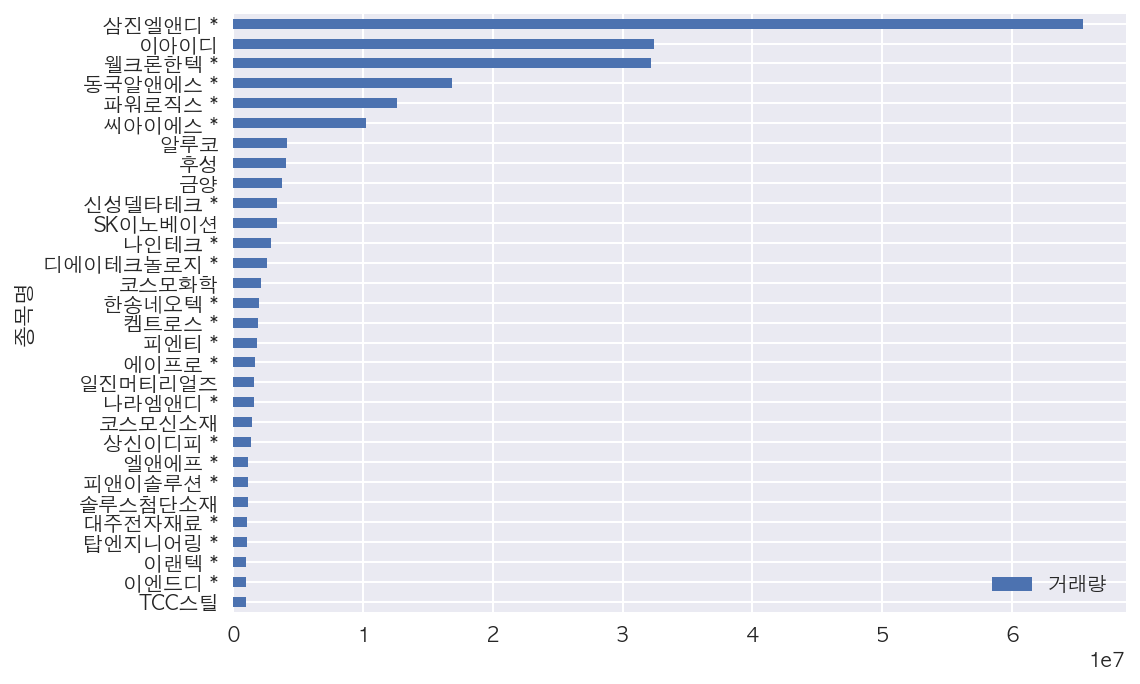

In [14]:
# 종목명 대비 거래량을 bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# sort_values시의 기본값이 오름차순이기 때문에 
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화 합니다.
temp = raw[["종목명", "거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

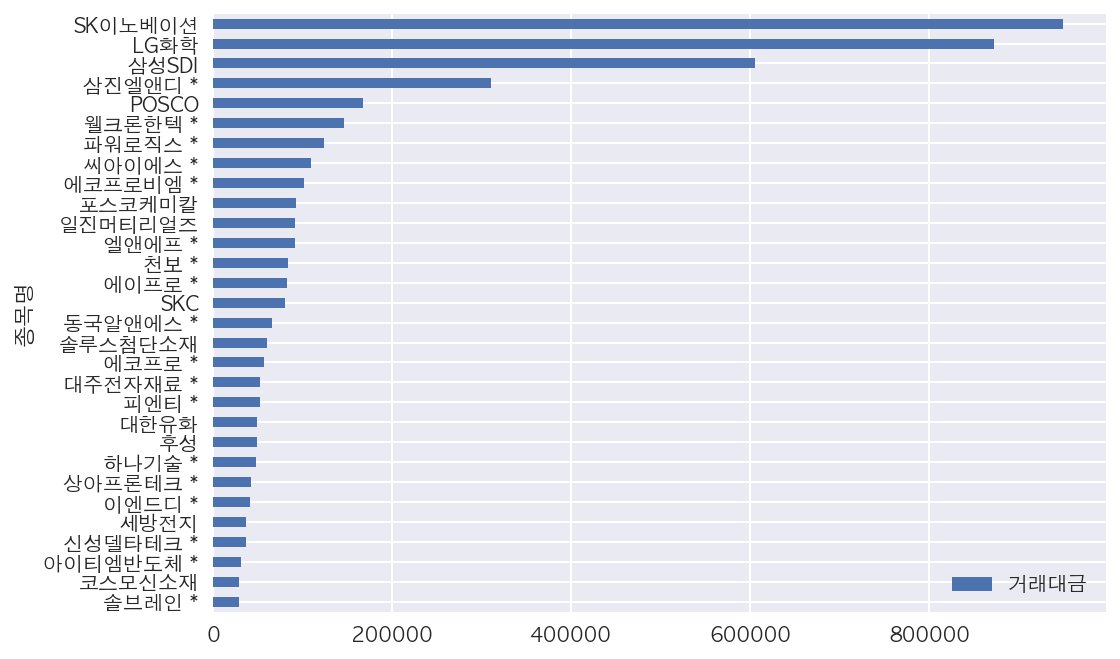

In [15]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[["종목명", "거래대금"]].set_index("종목명")
temp = temp.sort_values("거래대금").tail(30)
temp.plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [16]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

In [17]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,웰크론한텍 *,웰크론한텍
2,이엔드디 *,이엔드디
3,삼진엘앤디 *,삼진엘앤디
4,SK이노베이션,SK이노베이션
5,일진머티리얼즈,일진머티리얼즈


In [18]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담습니다.
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [19]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
df_item_code_name = df_krx[["Symbol", "Name"]]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [20]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
raw.shape

(79, 12)

In [21]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df
df = raw.merge(df_item_code_name, on="종목명_전처리", how='left')
df.shape

(79, 13)

In [22]:
# 병합이 잘 되었는지 확인합니다.
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,웰크론한텍 *,테마 편입 사유,4765.0,820.0,+20.79%,4765.0,4770.0,32171066.0,146663.0,6941573.0,2021-01-09,웰크론한텍,076080
1,이엔드디 *,테마 편입 사유,43500.0,3600.0,+9.02%,43450.0,43500.0,999308.0,41912.0,475248.0,2021-01-09,이엔드디,101360
2,삼진엘앤디 *,테마 편입 사유,4465.0,350.0,+8.51%,4465.0,4470.0,65461738.0,310756.0,45874433.0,2021-01-09,삼진엘앤디,054090
3,SK이노베이션,테마 편입 사유,283000.0,20000.0,+7.60%,283000.0,283500.0,3363732.0,950235.0,2014564.0,2021-01-09,SK이노베이션,096770
4,일진머티리얼즈,테마 편입 사유,56400.0,3800.0,+7.22%,56300.0,56400.0,1661973.0,91832.0,399206.0,2021-01-09,일진머티리얼즈,020150


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [23]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "068270"
item_name = "셀트리온"

In [24]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=068270'

In [25]:
# read_html을 이용해 데이터를 수집합니다.
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [26]:
# 제대로 수집이 되었는지 확인합니다.
tables[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2020.12(E)
,주요재무정보,IFRS연결
0,매출액,5260.00
1,영업이익,2444.00
2,당기순이익,1724.00
3,영업이익률,46.46
4,순이익률,32.78
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [27]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.09),추정PERlEPS,PBRlBPS (2020.09),배당수익률,동일업종 PER,동일업종 등락률
1,134997805,28093033,20.81%,"3.93매수 l 364,325","396,240 l 136,008","99.19배 l 3,700원","85.00배 l 4,325원","15.47배 l 23,717원",NaN,109.73배,+0.84%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [28]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [29]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = tables[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [30]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [31]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0         1
 0         매출액   5260.00
 1        영업이익   2444.00
 2       당기순이익   1724.00
 3       영업이익률     46.46
 4        순이익률     32.78
 5   ROE(지배주주)       NaN
 6        부채비율       NaN
 7        당좌비율       NaN
 8         유보율       NaN
 9      EPS(원)   1282.00
 10     PER(배)    286.31
 11     BPS(원)  25019.00
 12     PBR(배)     14.67
 13   주당배당금(원)       NaN
 14   시가배당률(%)       NaN
 15    배당성향(%)       NaN,
           0               1
 0      시가총액  49조  5,442  억원
 1    시가총액순위          코스피 9위
 2     상장주식수       134997805
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  134997805
 1  외국인보유주식수(B)   28093033
 2  외국인소진율(B/A)     20.81%,
            0                    1
 0  투자의견l목표주가   3.93매수  l  364,325
 1   52주최고l최저  396,240  l  136,008,
                    0                   1
 0   PERlEPS(2020.09)   99.19배  l  3,700원
 1          추정PERlEPS   85.00배  l  4,325원
 2  PBRlBPS (2020.09)  15.47배  l  23,717원
 3              배당수익률                 NaN,
  

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [32]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[2]

,0,1
0,외국인한도주식수(A),134997805
1,외국인보유주식수(B),28093033
2,외국인소진율(B/A),20.81%


In [33]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5260
1,영업이익,2444
2,당기순이익,1724
3,영업이익률,46.46
4,순이익률,32.78
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),1282


## transpose를 통해 행과 열의 위치를 변경

In [49]:
df_item.set_index(0)

,1
0,
매출액,5260
영업이익,2444
당기순이익,1724
영업이익률,46.46
순이익률,32.78
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [34]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.09),추정PERlEPS,PBRlBPS (2020.09),배당수익률,동일업종 PER,동일업종 등락률
1,5260,2444,1724,46.46,32.78,NaN,NaN,NaN,NaN,1282,...,28093033,20.81%,"3.93매수 l 364,325","396,240 l 136,008","99.19배 l 3,700원","85.00배 l 4,325원","15.47배 l 23,717원",NaN,109.73배,+0.84%


## 개별 주가 정보를 수집하는 함수를 생성

In [35]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
            
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [36]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.09),추정PERlEPS,PBRlBPS (2020.09),배당수익률,동일업종 PER,동일업종 등락률
1,5260,2444,1724,46.46,32.78,NaN,NaN,NaN,NaN,1282,...,28093033,20.81%,"3.93매수 l 364,325","396,240 l 136,008","99.19배 l 3,700원","85.00배 l 4,325원","15.47배 l 23,717원",NaN,109.73배,+0.84%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [50]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:701: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [38]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/79 [00:00<?, ?it/s]

In [39]:
result

0     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1     0  매출액 영업이익 당기순이익  영업이익률   순이익률 ROE(지배주주) 부채비율...
2     0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3     0    매출액  영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율...
4     0   매출액 영업이익 당기순이익  영업이익률 순이익률 ROE(지배주주) 부채비율 ...
                            ...                        
74    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
75    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
76    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
77    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
78    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 79, dtype: object

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [40]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]

In [41]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,PBRlBPS (2020.09),배당수익률,동일업종 PER,동일업종 등락률,PERlEPS(2019.12),PBRlBPS (2019.12),배당수익률l2020.12,PERlEPS,PBRlBPS,종목코드
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1.45배 l 3,290원",NaN,7.42배,+0.03%,NaN,NaN,NaN,NaN,NaN,076080
1,275,64,61,23.27,22.18,NaN,NaN,NaN,NaN,600,...,NaN,NaN,64.44배,+2.24%,46.82배 l 929원,"7.26배 l 5,995원",NaN,NaN,NaN,101360
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1.15배 l 3,891원",NaN,86.29배,-0.54%,NaN,NaN,NaN,NaN,NaN,054090
3,85750,-1439,-2403,-1.68,-2.8,NaN,NaN,NaN,NaN,-1558,...,"1.58배 l 179,631원",NaN,-12.88배,+4.60%,NaN,NaN,NaN,NaN,NaN,096770
4,1673,184,NaN,10.97,NaN,NaN,NaN,NaN,NaN,296,...,"4.28배 l 13,170원",NaN,60.14배,+2.96%,NaN,NaN,NaN,NaN,NaN,020150


In [42]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(79, 13)

## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [51]:
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,웰크론한텍 *,테마 편입 사유,4765.0,820.0,+20.79%,4765.0,4770.0,32171066.0,146663.0,6941573.0,2021-01-09,웰크론한텍,076080
1,이엔드디 *,테마 편입 사유,43500.0,3600.0,+9.02%,43450.0,43500.0,999308.0,41912.0,475248.0,2021-01-09,이엔드디,101360
2,삼진엘앤디 *,테마 편입 사유,4465.0,350.0,+8.51%,4465.0,4470.0,65461738.0,310756.0,45874433.0,2021-01-09,삼진엘앤디,054090
3,SK이노베이션,테마 편입 사유,283000.0,20000.0,+7.60%,283000.0,283500.0,3363732.0,950235.0,2014564.0,2021-01-09,SK이노베이션,096770
4,일진머티리얼즈,테마 편입 사유,56400.0,3800.0,+7.22%,56300.0,56400.0,1661973.0,91832.0,399206.0,2021-01-09,일진머티리얼즈,020150


In [43]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info)

In [44]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((79, 13), (79, 37), (79, 49))

In [45]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,추정PERlEPS,PBRlBPS (2020.09),배당수익률,동일업종 PER,동일업종 등락률,PERlEPS(2019.12),PBRlBPS (2019.12),배당수익률l2020.12,PERlEPS,PBRlBPS
0,웰크론한텍 *,테마 편입 사유,4765.0,820.0,+20.79%,4765.0,4770.0,32171066.0,146663.0,6941573.0,...,N/A l N/A,"1.45배 l 3,290원",NaN,7.42배,+0.03%,NaN,NaN,NaN,NaN,NaN
1,이엔드디 *,테마 편입 사유,43500.0,3600.0,+9.02%,43450.0,43500.0,999308.0,41912.0,475248.0,...,N/A l N/A,NaN,NaN,64.44배,+2.24%,46.82배 l 929원,"7.26배 l 5,995원",NaN,NaN,NaN
2,삼진엘앤디 *,테마 편입 사유,4465.0,350.0,+8.51%,4465.0,4470.0,65461738.0,310756.0,45874433.0,...,N/A l N/A,"1.15배 l 3,891원",NaN,86.29배,-0.54%,NaN,NaN,NaN,NaN,NaN
3,SK이노베이션,테마 편입 사유,283000.0,20000.0,+7.60%,283000.0,283500.0,3363732.0,950235.0,2014564.0,...,"-13.00배 l -21,785원","1.58배 l 179,631원",NaN,-12.88배,+4.60%,NaN,NaN,NaN,NaN,NaN
4,일진머티리얼즈,테마 편입 사유,56400.0,3800.0,+7.22%,56300.0,56400.0,1661973.0,91832.0,399206.0,...,"50.00배 l 1,119원","4.28배 l 13,170원",NaN,60.14배,+2.96%,NaN,NaN,NaN,NaN,NaN


## 파일명 만들기

In [46]:
# 파일 이름을 url의 정보를 이용하여 만듭니다.
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만듭니다.
# file_name

file_name_1 = url.split("=")[1].replace("&", "_")
file_name_2 = url.split("=")[2]
file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'theme_no_64_2021-01-09.csv'

In [47]:
# csv 파일로 저장합니다.
df_info.to_csv(file_name, index=False)

In [48]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,...,추정PERlEPS,PBRlBPS (2020.09),배당수익률,동일업종 PER,동일업종 등락률,PERlEPS(2019.12),PBRlBPS (2019.12),배당수익률l2020.12,PERlEPS,PBRlBPS
0,웰크론한텍 *,테마 편입 사유,4765.0,820.0,+20.79%,4765.0,4770.0,32171066.0,146663.0,6941573.0,...,N/A l N/A,"1.45배 l 3,290원",NaN,7.42배,+0.03%,NaN,NaN,NaN,NaN,NaN
1,이엔드디 *,테마 편입 사유,43500.0,3600.0,+9.02%,43450.0,43500.0,999308.0,41912.0,475248.0,...,N/A l N/A,NaN,NaN,64.44배,+2.24%,46.82배 l 929원,"7.26배 l 5,995원",NaN,NaN,NaN
2,삼진엘앤디 *,테마 편입 사유,4465.0,350.0,+8.51%,4465.0,4470.0,65461738.0,310756.0,45874433.0,...,N/A l N/A,"1.15배 l 3,891원",NaN,86.29배,-0.54%,NaN,NaN,NaN,NaN,NaN
3,SK이노베이션,테마 편입 사유,283000.0,20000.0,+7.60%,283000.0,283500.0,3363732.0,950235.0,2014564.0,...,"-13.00배 l -21,785원","1.58배 l 179,631원",NaN,-12.88배,+4.60%,NaN,NaN,NaN,NaN,NaN
4,일진머티리얼즈,테마 편입 사유,56400.0,3800.0,+7.22%,56300.0,56400.0,1661973.0,91832.0,399206.0,...,"50.00배 l 1,119원","4.28배 l 13,170원",NaN,60.14배,+2.96%,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,하나기술 *,테마 편입 사유,143400.0,5500.0,-3.69%,143400.0,143500.0,331289.0,48566.0,380067.0,...,N/A l N/A,NaN,NaN,60.14배,+2.96%,"91.81배 l 1,562원","20.25배 l 7,082원",NaN,NaN,NaN
75,씨아이에스 *,테마 편입 사유,10400.0,400.0,-3.70%,10350.0,10400.0,10248736.0,109844.0,21750003.0,...,N/A l N/A,"9.11배 l 1,142원",NaN,186.32배,+4.94%,NaN,NaN,NaN,NaN,NaN
76,이아이디,테마 편입 사유,311.0,12.0,-3.72%,311.0,312.0,32436621.0,10203.0,36861303.0,...,N/A l N/A,1.45배 l 215원,NaN,-12.88배,+4.60%,NaN,NaN,NaN,NaN,NaN
77,나라엠앤디 *,테마 편입 사유,13150.0,650.0,-4.71%,13150.0,13200.0,1655695.0,22094.0,3432023.0,...,N/A l N/A,"2.24배 l 5,878원",NaN,-31.86배,-0.28%,NaN,NaN,NaN,NaN,NaN
